In [1]:
import numpy as np
import math
import scipy

import matplotlib.pyplot as plt
import european_call as ec

Question 2: Weak convergence

In [2]:
# Problem parameters and exact solution

r = 0.05
sigma = 0.5
T = 1
S_0 = 100
K = 110

# Exact solution
V_e = ec.european_call(r, sigma, T, S_0, K, 'value')

# Set the seed
np.random.seed(0)

In [3]:
# Monte Carlo simulation comparing to exact soluton

In [4]:
# Define M for total number of Monte Carlo paths, and M_2 for number of paths at a time
M = int(1e+7)
M_2 = int(1e+4)

# Define the steps
num_steps = int(M/M_2)
steps = [1 + i*M_2 for i in range(0, num_steps)]

In [5]:
# Initialize hh, err_1, err_2
hh = []
err_1 = []
err_2 = []

# running the code for different values of h
for p in range(1,7):
    N = 2**p
    h = T/N
    
    sum_1 = 0
    sum_2 = 0
    
    for m in steps:
        m_2 = min(M_2, M - m + 1)
        S = S_0*np.ones(m_2)          # Initial value for all paths
        
        # Repeatedly we move by dW steps taken from the normal distribution
        for n in range(1, N+1):
            dW = math.sqrt(h)*np.random.standard_normal(m_2)
            S = np.multiply(S, 1 + r*h + sigma*dW)
        
        P = np.multiply(math.exp(-r*T), np.maximum(S-K, np.zeros(m_2)))
        P_squared = np.multiply(P,P)
            
        sum_1 = sum_1 + np.sum(P)
        sum_2 = sum_2 + np.sum(P_squared)
    
    # Error calculations
    V = sum_1/M
    sd = math.sqrt((sum_2/M - (sum_1/M)**2)/(M-1))
    
    hh.append(h)
    err_1.append(abs(V - V_e))
    err_2.append(3*sd)

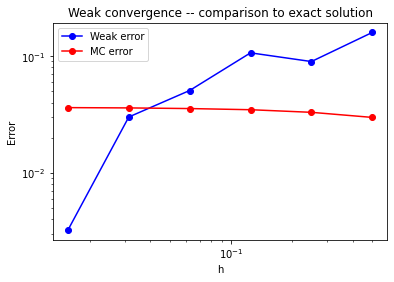

In [6]:
# plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(hh, err_1, color = 'blue', marker = 'o', label = 'Weak error')
ax.loglog(hh, err_2, color = 'red', marker = 'o', label = 'MC error')

ax.set_xlabel('h')
ax.set_ylabel('Error')
ax.set_title('Weak convergence -- comparison to exact solution')
ax.legend()

plt.show()

In [7]:
# Monte Carlo simulation comparing 2h simulation

In [8]:
# Initialize error arrays 
hh = []
err_1 = []
err_2 = []

# Running the code for different values of h
for p in range(1,8):
    N = 2**p
    h = T/N
    
    sum_1 = 0
    sum_2 = 0
    
    for m in steps:
        m_2 = min(M_2, M-m+1)
        
        # Initial value for all paths
        S = S_0*np.ones((1,m_2))
        S2 = S_0*np.ones((1,m_2))
        
        # Repeatedly move dW steps taken from the normal distribution
        for n in range(0, int(N/2)):
            dW1 = math.sqrt(h)*np.random.standard_normal(m_2)
            S = np.multiply(S, 1 + r*h + sigma*dW1)
            dW2 = math.sqrt(h)*np.random.standard_normal(m_2)
            S = np.multiply(S, 1 + r*h + sigma*dW2)
            
            # move up by two steps at a time
            S2 = np.multiply(S2, (1 + r*2*h + sigma*(dW1 + dW2)))
        
        P = np.multiply(math.exp(-r*T), np.maximum(S-K, np.zeros((1,m_2))))
        P2 = np.multiply(math.exp(-r*T), np.maximum(S2-K, np.zeros((1,m_2))))
        
        sub = P - P2
        sub_squared = np.multiply(sub,sub)
        
        sum_1 = sum_1 + np.sum(sub)
        sum_2 = sum_2 + np.sum(sub_squared)
    
    # Error calculations
    Vd = abs(sum_1/M)
    sd = math.sqrt((sum_2/M - (sum_1/M)**2)/(M-1))
    
    hh.append(h)
    err_1.append(Vd)
    err_2.append(3*sd)

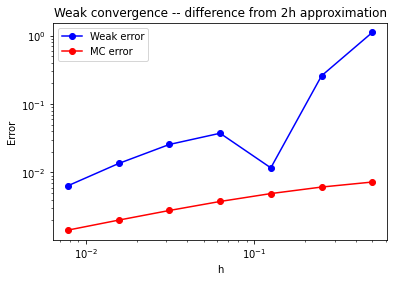

In [9]:
# plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(hh, err_1, color = 'blue', marker = 'o', label = 'Weak error')
ax.loglog(hh, err_2, color = 'red', marker = 'o', label = 'MC error')

ax.set_xlabel('h')
ax.set_ylabel('Error')
ax.set_title('Weak convergence -- difference from 2h approximation')
ax.legend(loc = 'upper left')

plt.show()